In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from collections import OrderedDict

import pandas as pd
import numpy as np
import os

In [2]:
# Constants
RANDOM_STATE = 42
data_file_name = 'spambase.data'
data_path = f'../data/spam/{data_file_name}'

In [3]:
# Load Data
spam_data = pd.read_csv(data_path, header=None)
spam_data

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [4]:
full_x_data = spam_data.drop(57, axis=1)
full_y_data = spam_data[57]
print(full_x_data.shape)
print(full_y_data.shape)

(4601, 57)
(4601,)


In [5]:
# Prepare clasifiers to compare with different values of M (max_features):
m_values = np.arange(1, 58, 1)
ensemble_clfs = []

for m in m_values:
    ensemble_clfs.append((m, RandomForestClassifier(n_estimators=200, criterion="gini", oob_score=True, max_depth=20, random_state=RANDOM_STATE, max_features=m)))

In [6]:
# List of errors per M value (<M value>, <oob error>, <cv test error>).
error_rate = []

## Calculate errors

In [7]:
def get_oob_error(trained_clf):
    return 1 - trained_clf.oob_score_

In [8]:
def get_avg_f1_score_by_cv(clf, x_data, y_data, k=10):
    scores =  cross_val_score(clf, x_data, y_data, scoring='f1', cv=k)
    res = 0
    for score in scores:
        res = res + score
    return res / k

In [9]:
for m, clf in ensemble_clfs:
    clf.fit(full_x_data, full_y_data)
    oob_100_error = get_oob_error(clf)
    test_error = get_avg_f1_score_by_cv(clf, full_x_data, full_y_data)
    
    error_rate.append((m, oob_100_error, test_error))

In [10]:
error_rate

[(1, 0.054770702021299744, 0.9126603644449498),
 (2, 0.050423820908498174, 0.9179159699125454),
 (3, 0.0484677244077375, 0.9233113269217392),
 (4, 0.04564225168441638, 0.9219344188822086),
 (5, 0.044990219517496155, 0.9226751475419622),
 (6, 0.04585959574005649, 0.9213796289742395),
 (7, 0.04716366007389694, 0.9208572032916938),
 (8, 0.0460769397956966, 0.923691199339217),
 (9, 0.04803303629645728, 0.9229669799601987),
 (10, 0.04890241251901761, 0.9206026960614595),
 (11, 0.046294283851336715, 0.92344380923304),
 (12, 0.046511627906976716, 0.9217962719905307),
 (13, 0.0486850684633775, 0.919596810970094),
 (14, 0.0484677244077375, 0.9194060020771024),
 (15, 0.049337100630297726, 0.9230194761304509),
 (16, 0.049119756574657725, 0.9195189982671795),
 (17, 0.04716366007389694, 0.9196717502092474),
 (18, 0.04977178874157795, 0.918317809390442),
 (19, 0.049337100630297726, 0.9175678038353661),
 (20, 0.050858509019778286, 0.9167625101003478),
 (21, 0.04955444468593784, 0.9163091242489259),
 

## Plot Results

In [11]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline

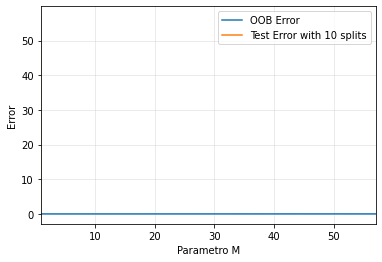

In [13]:
m_value, oob_100_x, test_err_x = zip(*error_rate)
# smooth_oob_100_x = np.linspace(oob_100_x.min(), oob_100_x.max(), 300)
plt.plot(m_value, oob_100_x, label='OOB Error')
# plt.plot(m_value, oob_70_x, label='OOB over train data')
plt.plot(test_err_x,  m_value, label='Test Error with 10 splits')

# Min M value = 1
# Max M value = 57
plt.grid(b=True, alpha=0.3)
plt.xlim(1, 57)
plt.xlabel("Parametro M")
plt.ylabel("Error")
plt.legend(loc="upper right")
plt.show()